In [1]:
### !pip installations

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [82]:
# Importing the necessary libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [4]:
data = pd.read_csv('c:/datasets/heart_2020.csv')
df = data.copy()
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [6]:
df.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
126837,No,20.36,Yes,No,No,0.0,15.0,No,Female,50-54,White,No,Yes,Excellent,8.0,No,No,Yes
103260,No,20.12,Yes,No,No,30.0,30.0,No,Female,65-69,White,No,No,Good,6.0,Yes,No,Yes
177837,No,33.89,No,No,No,0.0,4.0,No,Female,45-49,White,No,Yes,Very good,7.0,No,No,No
261953,No,38.01,No,No,No,0.0,0.0,No,Female,55-59,White,No,Yes,Very good,6.0,No,No,No
45795,Yes,22.46,No,No,No,4.0,0.0,Yes,Female,80 or older,White,Yes,Yes,Poor,7.0,No,No,No


# Exploratory Data Analysis

In [7]:
df.shape

(319795, 18)

In [8]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319779 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319792 non-null  float64
 6   MentalHealth      319794 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319791 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319782 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [10]:
cols = df.columns
print(cols)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


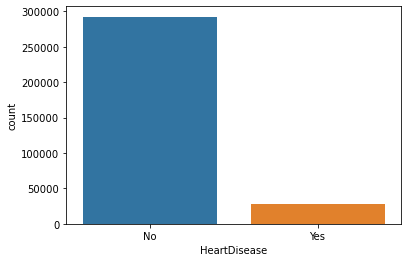

In [11]:
# Checking the distribution of labels in the outcome variable to verify data imbalance

sns.countplot(x=df['HeartDisease'])
plt.show()

In [12]:
# Seperating the numerical from categorical features

continuous_vars=df.select_dtypes('float64').columns
print(continuous_vars)
categorical_vars=df.select_dtypes('object').columns
print(categorical_vars)

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')
Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


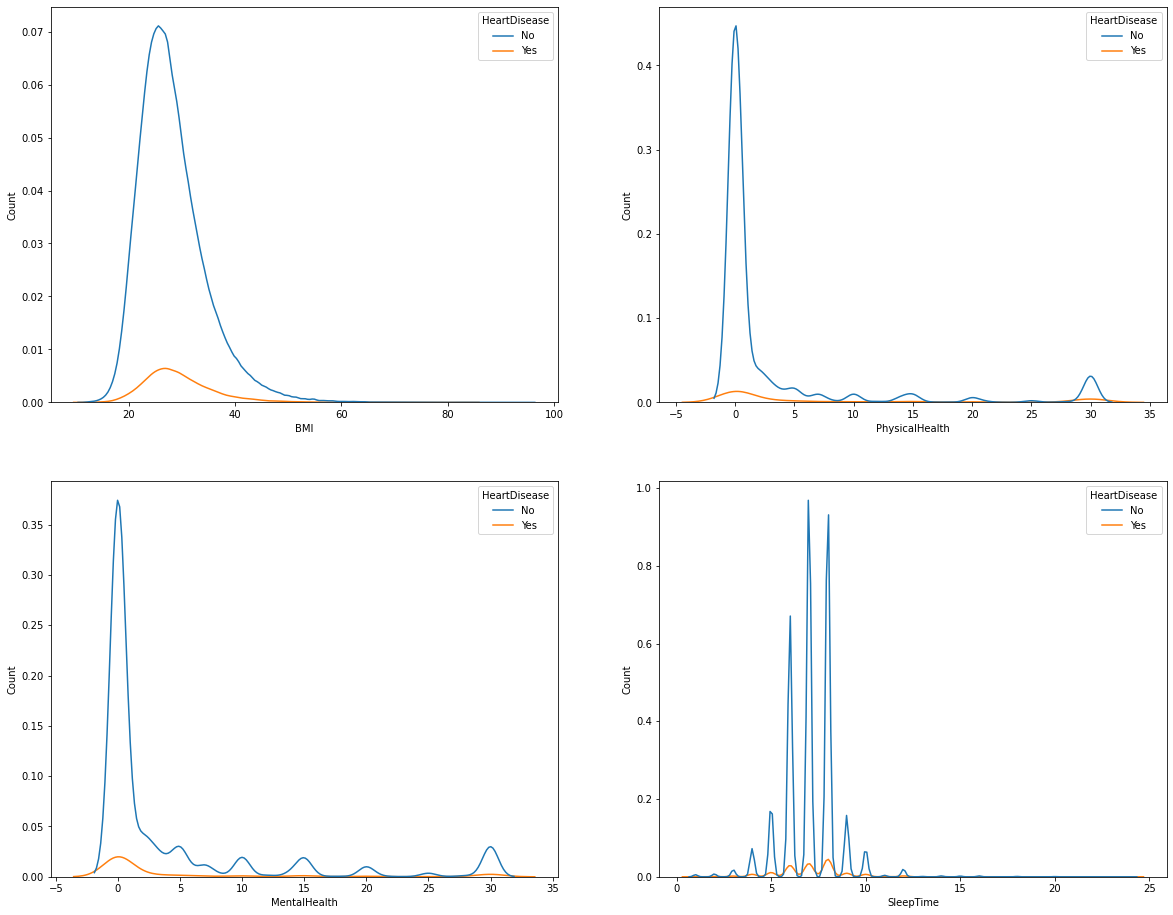

In [13]:
# Visualising the distribution and relationship between input and the outcom variables.
# Checking for the continuous variables

i=1
plt.figure(figsize = (20,16))
for col in continuous_vars:
    plt.subplot(2,2,i)
    sns.kdeplot(x=col,hue='HeartDisease',data=df)
    plt.xlabel(col)
    plt.ylabel("Count")
    i+=1

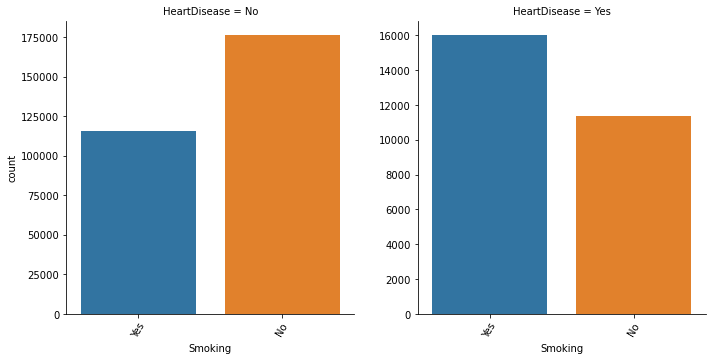

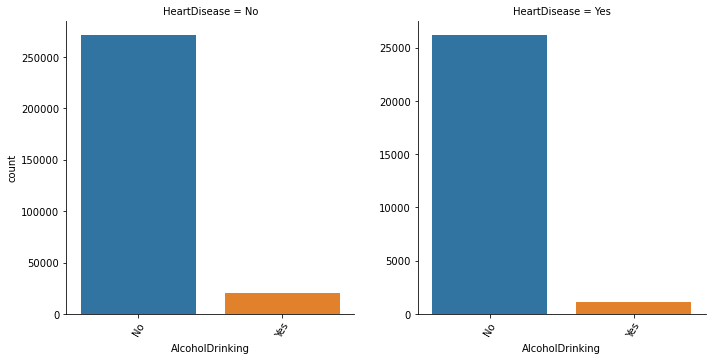

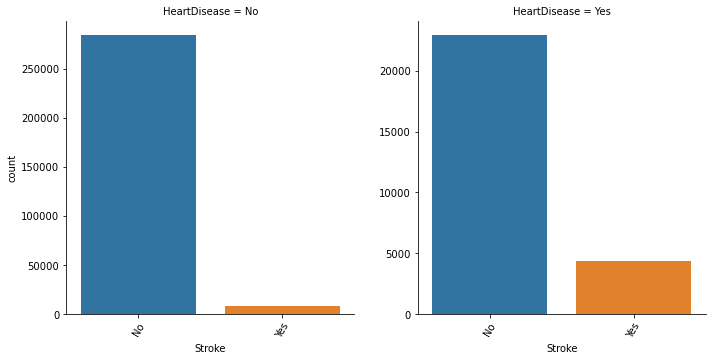

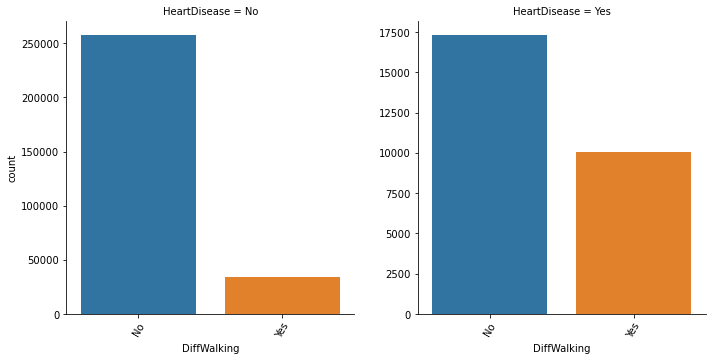

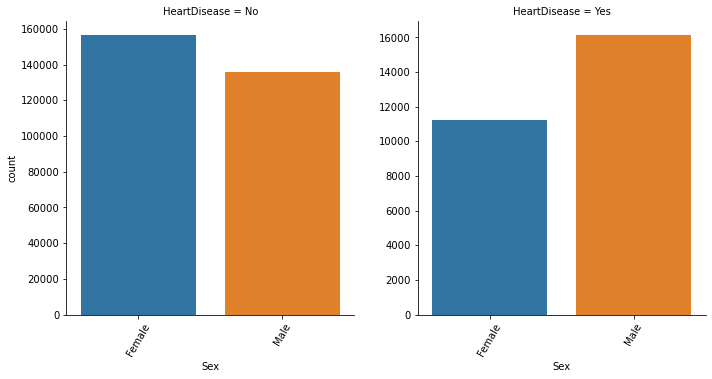

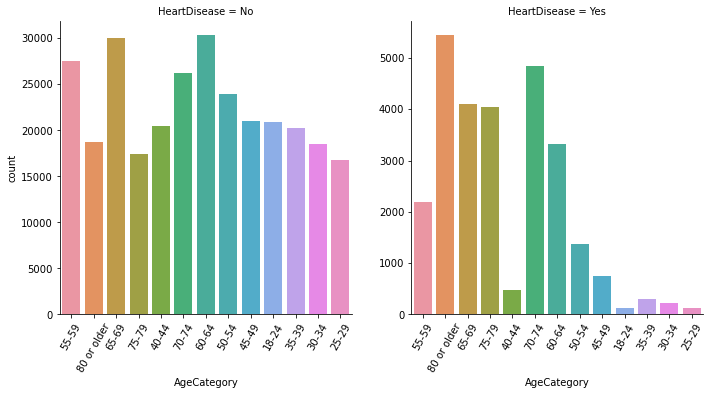

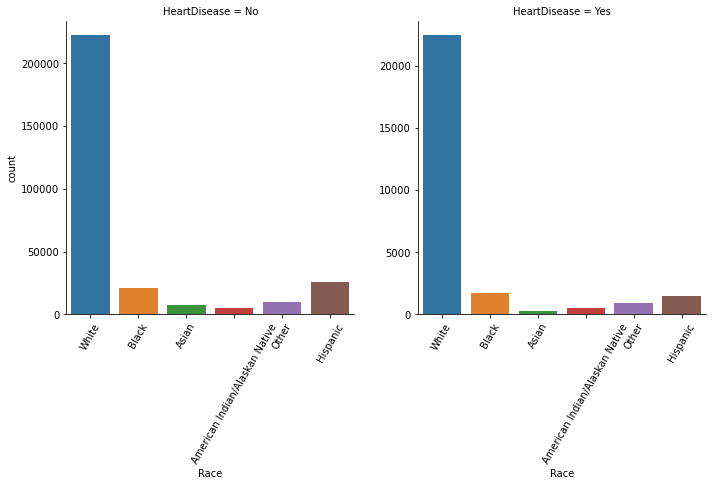

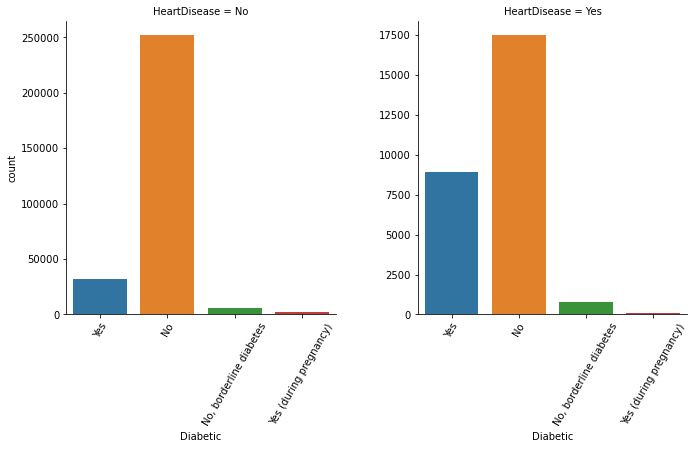

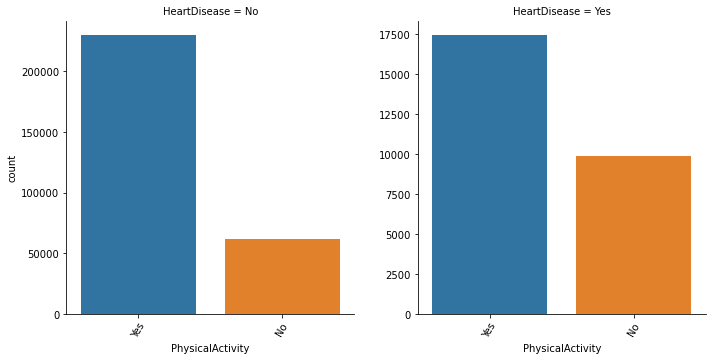

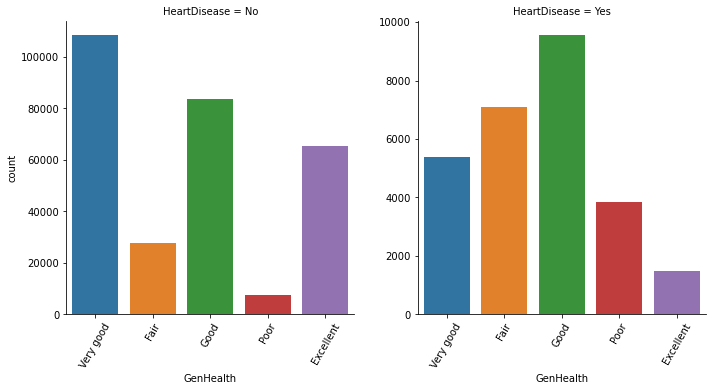

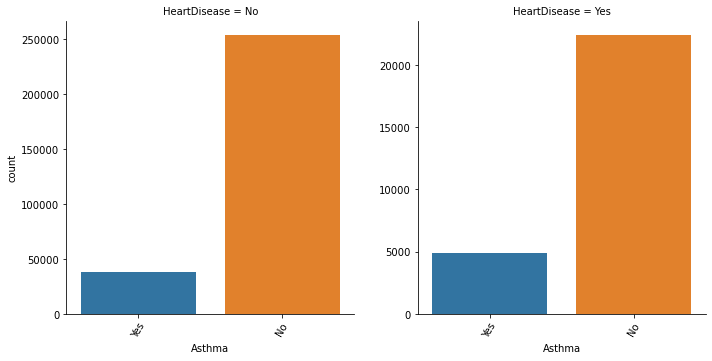

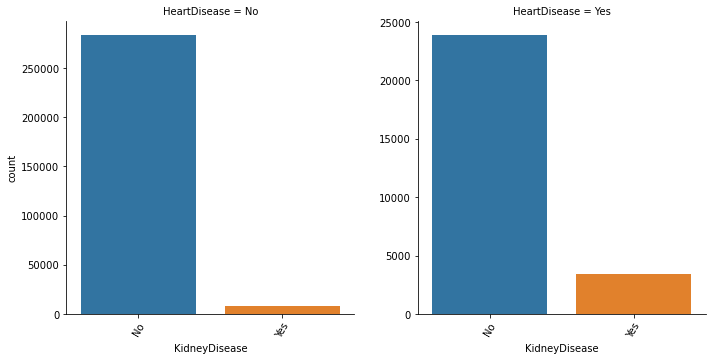

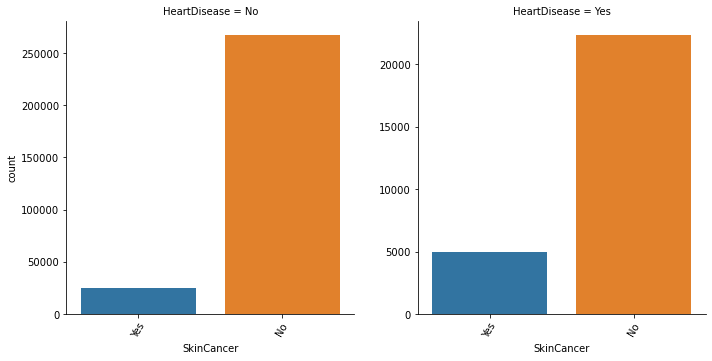

In [14]:
# Checking for the categorical variables

for col in categorical_vars[1:]:
    g = sns.catplot(x=col, col='HeartDisease', kind='count', data=df, sharey=False)
    g.set_xticklabels(rotation=60)

In [15]:
# Inspecting for missing values

df.isna().sum()

HeartDisease         0
BMI                 16
Smoking              0
AlcoholDrinking      0
Stroke               0
PhysicalHealth       3
MentalHealth         1
DiffWalking          0
Sex                  0
AgeCategory          4
Race                 0
Diabetic             0
PhysicalActivity     0
GenHealth            0
SleepTime           13
Asthma               0
KidneyDisease        0
SkinCancer           0
dtype: int64

In [16]:
# Inspecting for duplicates in the data

print("Duplicates in dataset:", df.duplicated().sum())
df[df.duplicated()]

Duplicates in dataset: 18075


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


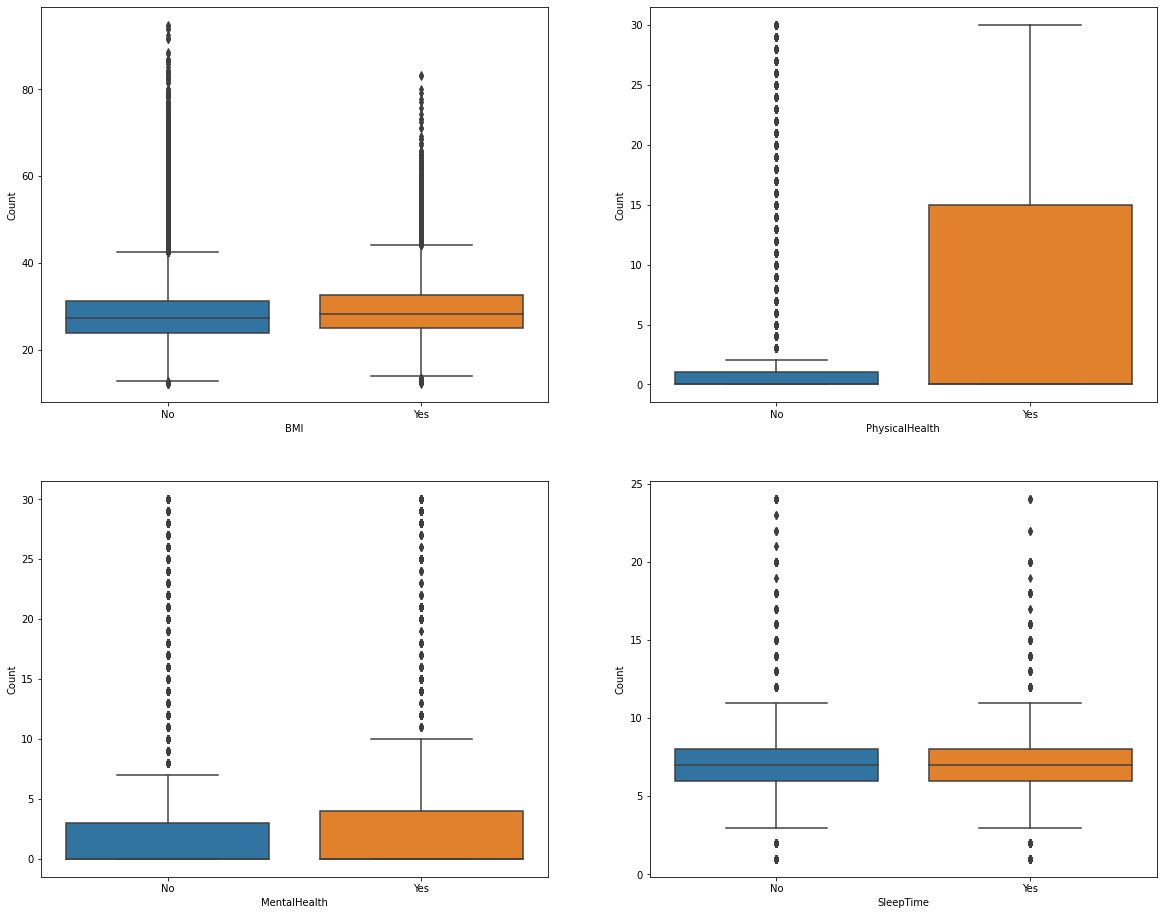

In [17]:
# inspecting for outliers in the data and their relationship with the outcome variable

i=1
plt.figure(figsize = (20,16))
for col in continuous_vars:
    plt.subplot(2,2,i)
    sns.boxplot(y=col, x='HeartDisease', data=df)
    plt.xlabel(col)
    plt.ylabel("Count")
    i+=1

In [18]:
# Inspecting for mis-labels, label variations and spurious data entries 
# By getting all the unique values in only the categorical features in the data 
# Also, this codes help to check for data type mismatch in the columns

categorical_vars = df.select_dtypes(include=['object', 'category'])
for col in categorical_vars:
    dtype = categorical_vars[col].dtype
    unique_values = df[col].unique()
    print(f"Column '{col}' (dtype: {dtype}):")
    print(unique_values)
    print()

Column 'HeartDisease' (dtype: object):
['No' 'Yes']

Column 'Smoking' (dtype: object):
['Yes' 'No']

Column 'AlcoholDrinking' (dtype: object):
['No' 'Yes']

Column 'Stroke' (dtype: object):
['No' 'Yes']

Column 'DiffWalking' (dtype: object):
['No' 'Yes']

Column 'Sex' (dtype: object):
['Female' 'Male']

Column 'AgeCategory' (dtype: object):
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' nan '18-24' '35-39' '30-34' '25-29']

Column 'Race' (dtype: object):
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']

Column 'Diabetic' (dtype: object):
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']

Column 'PhysicalActivity' (dtype: object):
['Yes' 'No']

Column 'GenHealth' (dtype: object):
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']

Column 'Asthma' (dtype: object):
['Yes' 'No']

Column 'KidneyDisease' (dtype: object):
['No' 'Yes']

Column 'SkinCancer' (dtype: object):
['Yes' 'No']



In [19]:
# Also, this codes help to check for data type mismatch in the columns

continuous_vars = df.select_dtypes(include=['int', 'float'])
for col in continuous_vars:
    dtype = continuous_vars[col].dtype
    unique_values = df[col].unique()
    print(f"Column '{col}' (dtype: {dtype}):")
    print(unique_values)
    print()

Column 'BMI' (dtype: float64):
[16.6  20.34 26.58 ... 62.42 51.46 46.56]

Column 'PhysicalHealth' (dtype: float64):
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. nan 18.  8.
 25. 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]

Column 'MentalHealth' (dtype: float64):
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19. nan]

Column 'SleepTime' (dtype: float64):
[ 5.  7.  8.  6. 12.  4.  9. 10. 15. nan  3.  2.  1. 16. 18. 14. 20. 11.
 13. 17. 24. 19. 21. 22. 23.]



# Inference from the exploratory data analysis carried out on the data:

1. The data is a binary outcome varriable data and there are (319795) rows and (18) features with float64(4) and object(14) in the data including the outcome variable. 

2. The data contains a mixture of categorical and numeric features. Therefore, label_encoding/ordinal_encoding 
would be needed to handle it at the data transformation and preprocessing stage.

3. There are missing values in 5 features in the data, with the BMI and SleepTime features having the highest count 
of empty cells in them. Therefore, treatment for missing values would be implemented to handle it.

4. There is a total of 18075 duplicated rows in the data. And there would be need to drop them.

5. There are outliers in all the numerical features in the data. Hence, treatment for outliers would be needful to reduce distortion, noise and skewness in the data.

6. There are label variations in two categorical feature in the data. Namely, the Diabetic and AgeCategory columns

7. No data types mismatch are detected in all features in the data 

8. Distribution in some of the input features are largely non-gausian

9. There is a presence of data imbalance in the distributions of labels in the outcome variable: 'HeatDisease'. this may pose challenge at the modeling stage. 

# Data Cleaning - Treating for all abnormal observations

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319779.0,28.325295,6.356031,12.02,24.03,27.34,31.425,94.85
PhysicalHealth,319792.0,3.371726,7.950885,0.00,0.00,0.00,2.000,30.00
MentalHealth,319794.0,3.898378,7.955245,0.00,0.00,0.00,3.000,30.00
SleepTime,319782.0,7.097057,1.436028,1.00,6.00,7.00,8.000,24.00


In [21]:
# Treating for missing values - numeric features by filling up with the mean and median values respectively.
# For BMI and SleepTime, I filled up with the mean.
# For PhysicalHealth and MentalHealth, I filled up with the median. 

indices_mean = [1, 14] 
indices_median = [5, 6]
mean_values = df.iloc[:, indices_mean].mean()
median_values = df.iloc[:, indices_median].median()

# Fill missing values with mean values for columns 1 and 14
df.iloc[:, indices_mean] = df.iloc[:, indices_mean].fillna(mean_values)

# Fill missing values with median values for columns 2 and 15
df.iloc[:, indices_median] = df.iloc[:, indices_median].fillna(median_values)

#dropping missing values on AgeCategory
df = df.dropna(subset=['AgeCategory'])

In [22]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [23]:
# Dropping duplicates in the data == 18075
df.drop_duplicates(keep = 'first', inplace = True)

C:\Users\Lawre\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [24]:
df[df.duplicated()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer


In [25]:
# Treating for label variations in the data using the .replace()
df.Diabetic.unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [26]:
df['Diabetic'] = df['Diabetic'].replace(['No, borderline diabetes', 'Yes (during pregnancy)'],['No','Yes'])

C:\Users\Lawre\AppData\Local\Temp/ipykernel_9524/1776429221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diabetic'] = df['Diabetic'].replace(['No, borderline diabetes', 'Yes (during pregnancy)'],['No','Yes'])


In [27]:
# Checking to see corrected labels
df.Diabetic.unique()

array(['Yes', 'No'], dtype=object)

In [28]:
# Treating for label variations in the data using the .replace()
df.AgeCategory.unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [29]:
# Treating for label variation using .replace()
df['AgeCategory'] = df['AgeCategory'].replace(['80 or older'],['80'])

C:\Users\Lawre\AppData\Local\Temp/ipykernel_9524/3174914792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeCategory'] = df['AgeCategory'].replace(['80 or older'],['80'])


In [30]:
# Treating for outliers in the nunemrical features in the data using the inter-quartile range technique.

def outlier_lims(col):
    q3,q1 = np.percentile(col, [75,25])
    iqr = q3-q1
    upper_lim = q3 + 1.5*iqr
    lower_lim = q1 - 1.5*iqr
    return upper_lim, lower_lim

for col in continuous_vars:
    print("--------------------------------------------------")
    print("Column:", col)
    
    UL,LL = outlier_lims(df[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)
    
    total_outliers = len(df.loc[df[col]<LL,col]) + len(df.loc[df[col]>UL,col])
    percent = (total_outliers / len(df.index) )*100
    
    print("Percentage of Outliers=", percent)
    print("-------------------------------------------------- \n")

--------------------------------------------------
Column: BMI
Upper Limit = 43.08
Lower Limit = 12.600000000000005
Percentage of Outliers= 2.9511293770611338
-------------------------------------------------- 

--------------------------------------------------
Column: PhysicalHealth
Upper Limit = 5.0
Lower Limit = -3.0
Percentage of Outliers= 15.622027409972988
-------------------------------------------------- 

--------------------------------------------------
Column: MentalHealth
Upper Limit = 10.0
Lower Limit = -6.0
Percentage of Outliers= 13.162090051870143
-------------------------------------------------- 

--------------------------------------------------
Column: SleepTime
Upper Limit = 11.0
Lower Limit = 3.0
Percentage of Outliers= 1.505062724756807
-------------------------------------------------- 



In [31]:
# Viewing the outliers at the upper bound limits
df.loc[df[col]>UL]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
50,No,26.61,No,No,No,0.0,0.0,No,Female,65-69,White,No,Yes,Good,12.0,Yes,No,No
206,No,35.11,Yes,No,No,20.0,0.0,No,Female,75-79,Black,No,Yes,Fair,12.0,No,No,No
262,No,32.78,No,No,No,0.0,0.0,No,Male,70-74,Black,No,No,Very good,15.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318988,No,26.07,No,No,No,20.0,30.0,Yes,Female,55-59,Hispanic,No,No,Fair,14.0,No,No,No
319163,No,31.17,Yes,No,No,30.0,30.0,Yes,Male,60-64,Hispanic,Yes,No,Poor,12.0,Yes,No,No
319371,No,29.05,No,No,No,0.0,30.0,No,Female,40-44,Hispanic,No,No,Poor,15.0,No,No,No
319702,No,24.41,No,Yes,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Good,12.0,No,No,No


In [32]:
# Viewing the outliers at the upper bound limits
df.loc[df[col]<LL]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
235,No,43.54,No,No,No,0.0,0.0,Yes,Male,45-49,Black,Yes,Yes,Fair,2.0,No,No,No
250,No,18.84,Yes,No,Yes,0.0,30.0,No,Female,35-39,Black,No,No,Good,2.0,No,No,No
288,No,29.21,Yes,No,No,30.0,0.0,No,Male,45-49,White,No,Yes,Fair,2.0,No,No,No
560,No,25.75,No,No,No,0.0,0.0,No,Female,75-79,Black,No,Yes,Good,2.0,No,No,No
581,No,32.95,No,No,No,30.0,0.0,Yes,Female,40-44,Black,No,Yes,Excellent,1.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319229,No,29.63,Yes,Yes,No,14.0,30.0,No,Female,40-44,Hispanic,No,Yes,Poor,1.0,Yes,Yes,No
319290,No,18.16,No,No,No,30.0,30.0,No,Female,55-59,Hispanic,No,No,Excellent,1.0,No,No,No
319373,No,24.03,No,No,No,12.0,7.0,Yes,Female,50-54,Hispanic,Yes,No,Fair,2.0,No,No,No
319394,No,33.13,No,No,No,0.0,0.0,No,Male,55-59,Hispanic,No,Yes,Fair,2.0,No,Yes,No


In [33]:
# Checking for skewness before dropping outliers

df.select_dtypes(include='float64').skew()

BMI               1.297727
PhysicalHealth    2.501086
MentalHealth      2.237498
SleepTime         0.697409
dtype: float64

In [34]:
# Two of the variables are skewed by 2 points and needs to be deskewed. 
# Using log transformation for PhysicalHealth and MentalHealth to reduce skewness

df[['PhysicalHealth','MentalHealth']] = np.log1p(df[['PhysicalHealth','MentalHealth']])

C:\Users\Lawre\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [35]:
# Skewness reduction implemented

df.select_dtypes(include='float64').skew()

BMI               1.297727
PhysicalHealth    1.505469
MentalHealth      1.120922
SleepTime         0.697409
dtype: float64

In [36]:
# Dropping rows with outliers

for col in continuous_vars:
    UL, LL = outlier_lims(df[col])  
    outliers = df[(df[col] > UL) | (df[col] < LL)]  
    df = df.drop(outliers.index)  # Drop rows with outliers
    
    # Print information about dropped outliers
    print("Dropped outliers for column:", col)
    print("Number of dropped outliers:", len(outliers))
    print("--------------------------------------------------")

Dropped outliers for column: BMI
Number of dropped outliers: 8904
--------------------------------------------------
Dropped outliers for column: PhysicalHealth
Number of dropped outliers: 28883
--------------------------------------------------
Dropped outliers for column: MentalHealth
Number of dropped outliers: 0
--------------------------------------------------
Dropped outliers for column: SleepTime
Number of dropped outliers: 3099
--------------------------------------------------


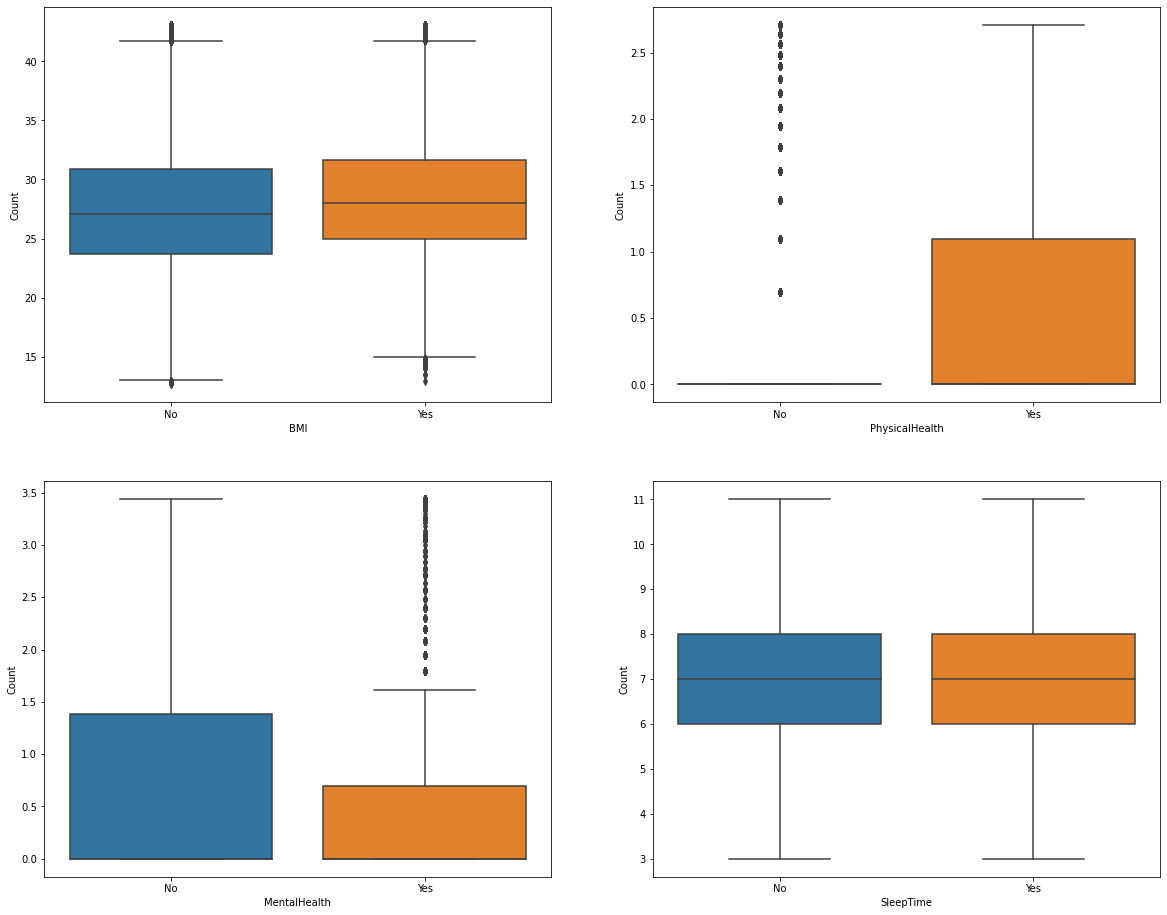

In [37]:
# Checking for any presence of outliers after treatment using interquartile range

i=1
plt.figure(figsize = (20,16))
for col in continuous_vars:
    plt.subplot(2,2,i)
    sns.boxplot(y=col, x='HeartDisease', data=df)
    plt.xlabel(col)
    plt.ylabel("Count")
    i+=1

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260829 entries, 0 to 319792
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      260829 non-null  object 
 1   BMI               260829 non-null  float64
 2   Smoking           260829 non-null  object 
 3   AlcoholDrinking   260829 non-null  object 
 4   Stroke            260829 non-null  object 
 5   PhysicalHealth    260829 non-null  float64
 6   MentalHealth      260829 non-null  float64
 7   DiffWalking       260829 non-null  object 
 8   Sex               260829 non-null  object 
 9   AgeCategory       260829 non-null  object 
 10  Race              260829 non-null  object 
 11  Diabetic          260829 non-null  object 
 12  PhysicalActivity  260829 non-null  object 
 13  GenHealth         260829 non-null  object 
 14  SleepTime         260829 non-null  float64
 15  Asthma            260829 non-null  object 
 16  KidneyDisease     26

# Data Transformation and Preprocessing

In [39]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,1.386294,3.433987,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.000000,0.000000,No,Female,80,White,No,Yes,Very good,7.0,No,No,No
3,No,24.21,No,No,No,0.000000,0.000000,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
7,No,31.64,Yes,No,No,1.791759,0.000000,Yes,Female,80,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.000000,0.000000,No,Female,80,White,No,No,Fair,5.0,No,Yes,No


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260829 entries, 0 to 319792
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      260829 non-null  object 
 1   BMI               260829 non-null  float64
 2   Smoking           260829 non-null  object 
 3   AlcoholDrinking   260829 non-null  object 
 4   Stroke            260829 non-null  object 
 5   PhysicalHealth    260829 non-null  float64
 6   MentalHealth      260829 non-null  float64
 7   DiffWalking       260829 non-null  object 
 8   Sex               260829 non-null  object 
 9   AgeCategory       260829 non-null  object 
 10  Race              260829 non-null  object 
 11  Diabetic          260829 non-null  object 
 12  PhysicalActivity  260829 non-null  object 
 13  GenHealth         260829 non-null  object 
 14  SleepTime         260829 non-null  float64
 15  Asthma            260829 non-null  object 
 16  KidneyDisease     26

In [41]:
for col in cols:
    print(col, df[col].unique())
    print()

HeartDisease ['No' 'Yes']

BMI [16.6  20.34 24.21 ... 15.57 27.43 40.7 ]

Smoking ['Yes' 'No']

AlcoholDrinking ['No' 'Yes']

Stroke ['No' 'Yes']

PhysicalHealth [1.38629436 0.         1.79175947 2.07944154 0.69314718 1.09861229
 1.60943791 2.39789527 1.94591015 2.7080502  2.19722458 2.56494936
 2.30258509 2.63905733 2.48490665]

MentalHealth [3.4339872  0.         1.09861229 1.79175947 2.77258872 1.60943791
 1.38629436 2.39789527 2.7080502  2.19722458 0.69314718 3.04452244
 2.07944154 3.36729583 3.21887582 1.94591015 3.25809654 2.89037176
 2.30258509 2.56494936 2.83321334 2.94443898 3.40119738 3.33220451
 3.13549422 2.63905733 3.09104245 3.29583687 3.17805383 2.48490665
 2.99573227]

DiffWalking ['No' 'Yes']

Sex ['Female' 'Male']

AgeCategory ['55-59' '80' '75-79' '65-69' '60-64' '50-54' '70-74' '45-49' '18-24'
 '35-39' '40-44' '30-34' '25-29']

Race ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']

Diabetic ['Yes' 'No']

PhysicalActivity ['Yes' 'No']

G

In [42]:
# Encoding categorical variables to numeric using LabelEncoder() to assign binary representations to the unque labels

encoder = LabelEncoder()
df['HeartDisease'] = encoder.fit_transform(df['HeartDisease']).astype('float64')
df['Smoking'] = encoder.fit_transform(df['Smoking'])
df['AlcoholDrinking'] = encoder.fit_transform(df['AlcoholDrinking'])
df['Stroke'] = encoder.fit_transform(df['Stroke'])
df['DiffWalking'] = encoder.fit_transform(df['DiffWalking'])
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Race'] = encoder.fit_transform(df['Race'])
df['Diabetic'] = encoder.fit_transform(df['Diabetic'])
df['PhysicalActivity'] = encoder.fit_transform(df['PhysicalActivity'])
df['Asthma'] = encoder.fit_transform(df['Asthma'])
df['KidneyDisease'] = encoder.fit_transform(df['KidneyDisease'])
df['SkinCancer'] = encoder.fit_transform(df['SkinCancer'])

In [43]:
# Encoding categorical to numeric using ordinalEnconder() so as to preserve the ranking in the variable

o_encoder = OrdinalEncoder(categories=[['Poor', 'Fair', 'Good', 'Very good', 'Excellent']])
df['GenHealth'] = o_encoder.fit_transform(df['GenHealth'].values.reshape(-1, 1))

In [44]:
# Converting the 'AgeCategory' column to a categorical data type, the .cat.codes attribute is used to assign a numeric code 
# to each unique category in the column

df['AgeCategory'] = df['AgeCategory'].astype('category').cat.codes

In [45]:
# Peeking at the new changes in the properties of the data after implementing label encoding on the categorical features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260829 entries, 0 to 319792
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      260829 non-null  float64
 1   BMI               260829 non-null  float64
 2   Smoking           260829 non-null  int32  
 3   AlcoholDrinking   260829 non-null  int32  
 4   Stroke            260829 non-null  int32  
 5   PhysicalHealth    260829 non-null  float64
 6   MentalHealth      260829 non-null  float64
 7   DiffWalking       260829 non-null  int32  
 8   Sex               260829 non-null  int32  
 9   AgeCategory       260829 non-null  int8   
 10  Race              260829 non-null  int32  
 11  Diabetic          260829 non-null  int32  
 12  PhysicalActivity  260829 non-null  int32  
 13  GenHealth         260829 non-null  float64
 14  SleepTime         260829 non-null  float64
 15  Asthma            260829 non-null  int32  
 16  KidneyDisease     26

In [46]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,1,0,0,1.386294,3.433987,0,0,7,5,1,1,3.0,5.0,1,0,1
1,0.0,20.34,0,0,1,0.000000,0.000000,0,0,12,5,0,1,3.0,7.0,0,0,0
3,0.0,24.21,0,0,0,0.000000,0.000000,0,0,11,5,0,0,2.0,6.0,0,0,1
7,0.0,31.64,1,0,0,1.791759,0.000000,1,0,12,5,1,0,2.0,9.0,1,0,0
8,0.0,26.45,0,0,0,0.000000,0.000000,0,0,12,5,0,0,1.0,5.0,0,1,0


In [47]:
# Analysing the statistical structure/properties of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDisease,260829.0,0.074551,0.262666,0.00,0.00,0.00,0.000000,1.000000
BMI,260829.0,27.715335,5.304759,12.65,23.78,27.12,31.000000,43.080000
Smoking,260829.0,0.404200,0.490737,0.00,0.00,0.00,1.000000,1.000000
AlcoholDrinking,260829.0,0.074325,0.262299,0.00,0.00,0.00,0.000000,1.000000
Stroke,260829.0,0.031216,0.173901,0.00,0.00,0.00,0.000000,1.000000
PhysicalHealth,260829.0,0.339471,0.688849,0.00,0.00,0.00,0.000000,2.708050
MentalHealth,260829.0,0.697988,1.075979,0.00,0.00,0.00,1.386294,3.433987
DiffWalking,260829.0,0.093019,0.290459,0.00,0.00,0.00,0.000000,1.000000
Sex,260829.0,0.478865,0.499554,0.00,0.00,0.00,1.000000,1.000000
AgeCategory,260829.0,6.388753,3.624459,0.00,3.00,7.00,9.000000,12.000000


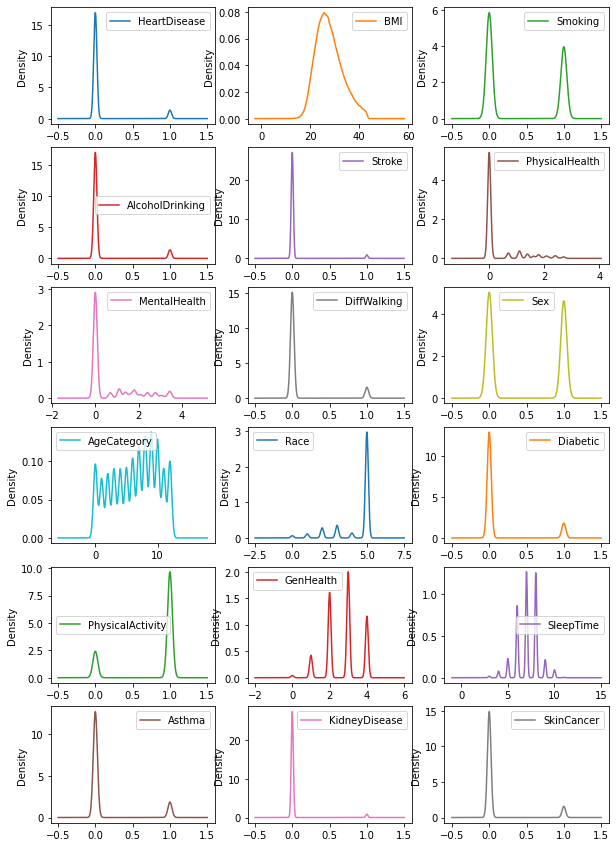

In [48]:
# Checking the cleaned data for normal or non-normal distribution using density plot

df.plot(kind='density', subplots=True, layout=(6,3), sharex=False, sharey=False)
plt.gcf().set_size_inches(10,15)
plt.show()

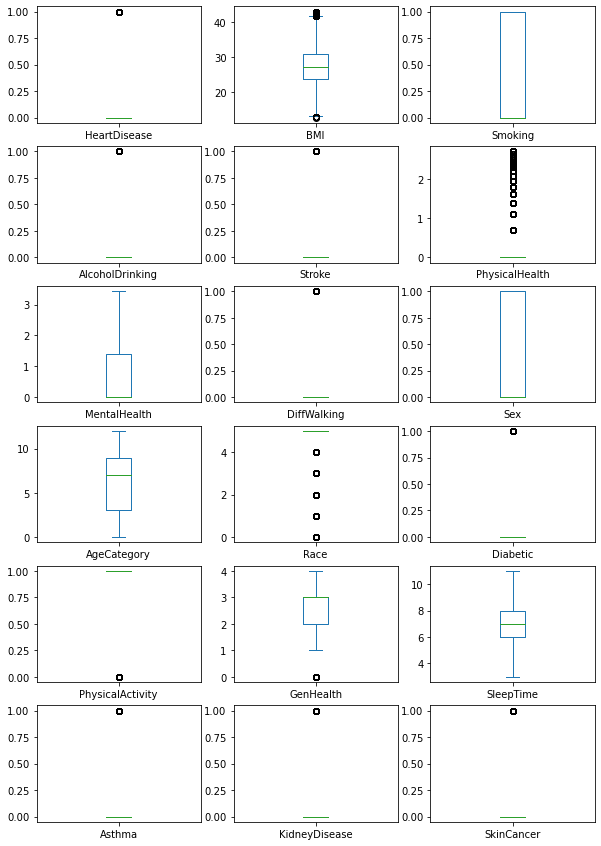

In [49]:
# Checking the cleaned data for normal or non-normal distribution using boxplot

df.plot(kind='box', subplots=True, layout=(6,3), sharex=False, sharey=False)
plt.gcf().set_size_inches(10,15)
plt.show()

Statistical Inference from the data:

 1. the scales across the features are not so wide, with about 70% of the minimum values lying at 0.0 while the maximum 
    values are higher than normal: therefore, recaling is needed
 2. the standard deviation in the features is almost with the range that can be accommodated except for two occurrences 
    of more than one standard deviation: may require standardization rescaling doe not significantly improve outlook.
 3. the distribution in the data is non-gausian, with majority of the variables skewed, bimodal and multi-modal as seen 
    in the plots: therefore, we may benefit from normalizing

In [50]:
df.columns
target = df['HeartDisease']

In [51]:
# Implementing rescaling on the data (between 0 and 1)

df_arr = df.values

Y = df_arr[:, 0]
X = df_arr[:, 1:]

scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_df = scaler.fit_transform(X)
set_printoptions(precision=3)
print(rescaled_df)

[[0.13  1.    0.    ... 1.    0.    1.   ]
 [0.253 0.    0.    ... 0.    0.    0.   ]
 [0.38  0.    0.    ... 0.    0.    1.   ]
 ...
 [0.485 1.    0.    ... 1.    0.    0.   ]
 [0.565 1.    0.    ... 1.    0.    0.   ]
 [0.381 0.    0.    ... 0.    0.    0.   ]]


In [52]:
# converting the rescaled X to a dataframe and adding back Y

rescaled_df = pd.DataFrame(rescaled_df, columns = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'])

#print(rescaled_df)
rescaled_df['HeartDisease'] = Y.astype(df['HeartDisease'].dtype)
rescaled_df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,0.129806,1.0,0.0,0.0,0.511916,1.0,0.0,0.0,0.583333,1.0,1.0,1.0,0.75,0.250,1.0,0.0,1.0,0.0
1,0.252711,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.000000,1.0,0.0,1.0,0.75,0.500,0.0,0.0,0.0,0.0
2,0.379888,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.916667,1.0,0.0,0.0,0.50,0.375,0.0,0.0,1.0,0.0
3,0.624055,1.0,0.0,0.0,0.661642,0.0,1.0,0.0,1.000000,1.0,1.0,0.0,0.50,0.750,1.0,0.0,0.0,0.0
4,0.453500,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,1.0,0.0,0.0,0.25,0.250,0.0,1.0,0.0,0.0


In [53]:
rescaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,260829.0,0.495082,0.174327,0.0,0.365757,0.475518,0.603023,1.0
Smoking,260829.0,0.404200,0.490737,0.0,0.000000,0.000000,1.000000,1.0
AlcoholDrinking,260829.0,0.074325,0.262299,0.0,0.000000,0.000000,0.000000,1.0
Stroke,260829.0,0.031216,0.173901,0.0,0.000000,0.000000,0.000000,1.0
PhysicalHealth,260829.0,0.125356,0.254371,0.0,0.000000,0.000000,0.000000,1.0
MentalHealth,260829.0,0.203259,0.313332,0.0,0.000000,0.000000,0.403698,1.0
DiffWalking,260829.0,0.093019,0.290459,0.0,0.000000,0.000000,0.000000,1.0
Sex,260829.0,0.478865,0.499554,0.0,0.000000,0.000000,1.000000,1.0
AgeCategory,260829.0,0.532396,0.302038,0.0,0.250000,0.583333,0.750000,1.0
Race,260829.0,0.874431,0.246161,0.0,1.000000,1.000000,1.000000,1.0


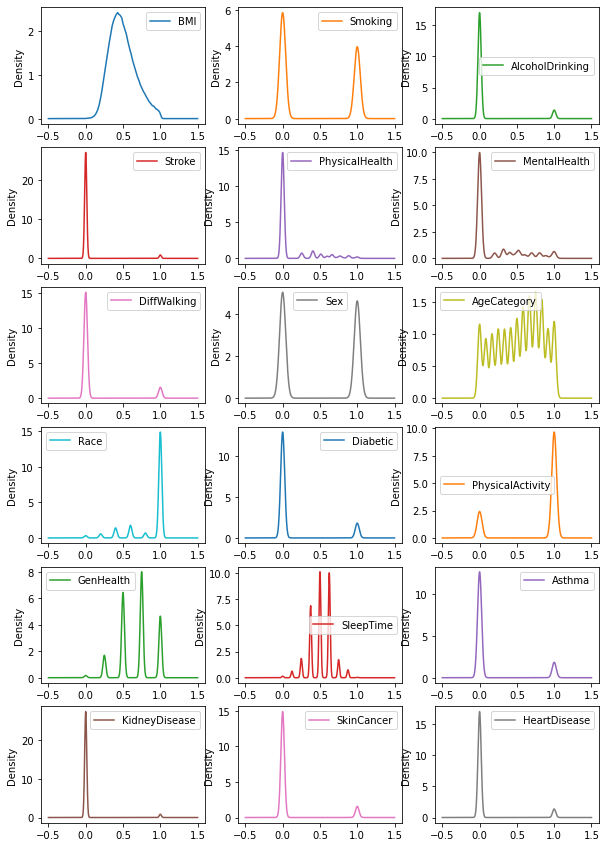

In [54]:
# Checking the rescaled data for normal or non-normal distribution using density plot

rescaled_df.plot(kind='density', subplots=True, layout=(6,3), sharex=False, sharey=False)
plt.gcf().set_size_inches(10,15)
plt.show()

In [55]:
rescaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260829 entries, 0 to 260828
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               260829 non-null  float64
 1   Smoking           260829 non-null  float64
 2   AlcoholDrinking   260829 non-null  float64
 3   Stroke            260829 non-null  float64
 4   PhysicalHealth    260829 non-null  float64
 5   MentalHealth      260829 non-null  float64
 6   DiffWalking       260829 non-null  float64
 7   Sex               260829 non-null  float64
 8   AgeCategory       260829 non-null  float64
 9   Race              260829 non-null  float64
 10  Diabetic          260829 non-null  float64
 11  PhysicalActivity  260829 non-null  float64
 12  GenHealth         260829 non-null  float64
 13  SleepTime         260829 non-null  float64
 14  Asthma            260829 non-null  float64
 15  KidneyDisease     260829 non-null  float64
 16  SkinCancer        26

In [56]:
# Standardization, continuing transformation using the outcome from the rescaling stage

rescaled_df_arr = rescaled_df.values

X = rescaled_df_arr[:, 0:17]
Y = rescaled_df_arr[:, 17]

scaler = StandardScaler().fit(X)
rescaled_df_std = scaler.transform(X)
set_printoptions(precision=3)
print(rescaled_df_std)

[[-2.095  1.214 -0.283 ...  2.618 -0.176  3.085]
 [-1.39  -0.824 -0.283 ... -0.382 -0.176 -0.324]
 [-0.661 -0.824 -0.283 ... -0.382 -0.176  3.085]
 ...
 [-0.058  1.214 -0.283 ...  2.618 -0.176 -0.324]
 [ 0.401  1.214 -0.283 ...  2.618 -0.176 -0.324]
 [-0.655 -0.824 -0.283 ... -0.382 -0.176 -0.324]]


In [57]:
# converting the rescaled X to a dataframe and adding back Y

rescaled_std =pd.DataFrame(rescaled_df_std, columns= ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'])

#print(rescaled_df)
rescaled_std['HeartDisease'] = Y
rescaled_std.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,-2.095356,1.214094,-0.283359,-0.179504,1.519672,2.542805,-0.320248,-0.958588,0.168645,0.510109,2.677409,0.499732,0.293912,-1.740890,2.618362,-0.17598,3.084600,0.0
1,-1.390327,-0.823659,-0.283359,5.570907,-0.492810,-0.648702,-0.320248,-0.958588,1.548164,0.510109,-0.373495,0.499732,0.293912,-0.073736,-0.381918,-0.17598,-0.324191,0.0
2,-0.660792,-0.823659,-0.283359,-0.179504,-0.492810,-0.648702,-0.320248,-0.958588,1.272261,0.510109,-0.373495,-2.001074,-0.790336,-0.907313,-0.381918,-0.17598,3.084600,0.0
3,0.739840,1.214094,-0.283359,-0.179504,2.108285,-0.648702,3.122581,-0.958588,1.548164,0.510109,2.677409,-2.001074,-0.790336,1.593418,2.618362,-0.17598,-0.324191,0.0
4,-0.238529,-0.823659,-0.283359,-0.179504,-0.492810,-0.648702,-0.320248,-0.958588,1.548164,0.510109,-0.373495,-2.001074,-1.874585,-1.740890,-0.381918,5.68245,-0.324191,0.0


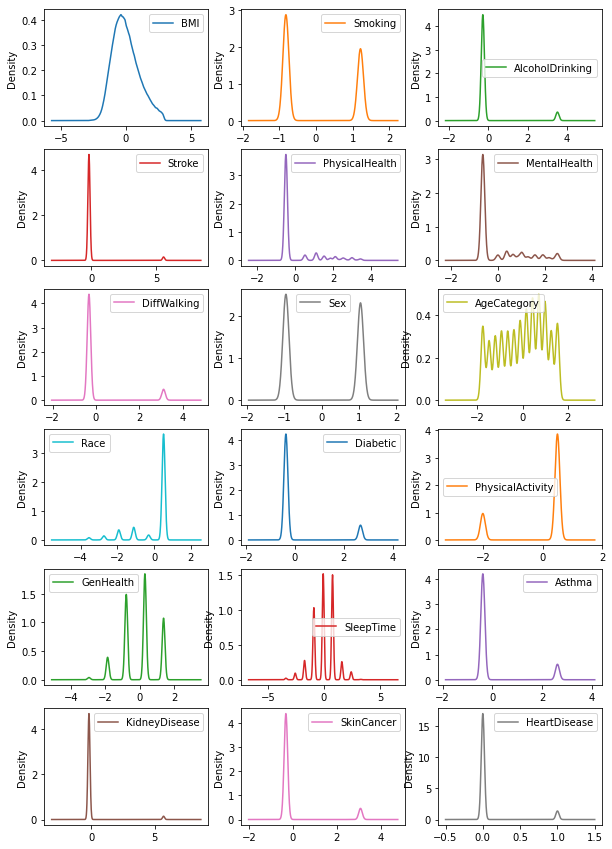

In [58]:
# Checking the rescaled, standardized data for normal or non-normal distribution using density plot

rescaled_std.plot(kind='density', subplots=True, layout=(6,3), sharex=False, sharey=False)
plt.gcf().set_size_inches(10,15)
plt.show()

In [59]:
# Implementing normalization on the rescaled and standardized data

rescaled_std_arr = rescaled_std.values

Y = rescaled_std_arr[:,17]
X = rescaled_std_arr[:,0:17]

scaler = Normalizer().fit(X)
normalized_df = scaler.transform(X)
set_printoptions(precision=3)
print(normalized_df)

[[-0.32   0.185 -0.043 ...  0.399 -0.027  0.47 ]
 [-0.223 -0.132 -0.045 ... -0.061 -0.028 -0.052]
 [-0.147 -0.184 -0.063 ... -0.085 -0.039  0.688]
 ...
 [-0.009  0.185 -0.043 ...  0.398 -0.027 -0.049]
 [ 0.099  0.301 -0.07  ...  0.65  -0.044 -0.081]
 [-0.259 -0.325 -0.112 ... -0.151 -0.069 -0.128]]


In [60]:
# Converting the normalized_df to a dataframe and adding back the Y column

normalized_df_R_S_N = pd.DataFrame(normalized_df, columns =['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'])

#print(normalized_df_R_S_N)
normalized_df_R_S_N['HeartDisease'] = Y.astype(rescaled_std['HeartDisease'].dtype)
normalized_df_R_S_N.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,-0.319541,0.185149,-0.043212,-0.027374,0.231750,0.387777,-0.048838,-0.146184,0.025718,0.077792,0.408304,0.076209,0.044821,-0.265485,0.399300,-0.026837,0.470401,0.0
1,-0.223112,-0.132176,-0.045472,0.893988,-0.079083,-0.104100,-0.051392,-0.153829,0.248441,0.081859,-0.059936,0.080194,0.047165,-0.011833,-0.061288,-0.028240,-0.052024,0.0
2,-0.147482,-0.183832,-0.063243,-0.040063,-0.109990,-0.144784,-0.071476,-0.213947,0.283956,0.113851,-0.083360,-0.446620,-0.176395,-0.202503,-0.085240,-0.039277,0.688451,0.0
3,0.114632,0.188115,-0.043904,-0.027813,0.326662,-0.100511,0.483820,-0.148526,0.239876,0.079037,0.414844,-0.310051,-0.122457,0.246888,0.405695,-0.027267,-0.050231,0.0
4,-0.034279,-0.118369,-0.040722,-0.025797,-0.070822,-0.093225,-0.046023,-0.137759,0.222488,0.073308,-0.053675,-0.287576,-0.269398,-0.250184,-0.054886,0.816628,-0.046590,0.0


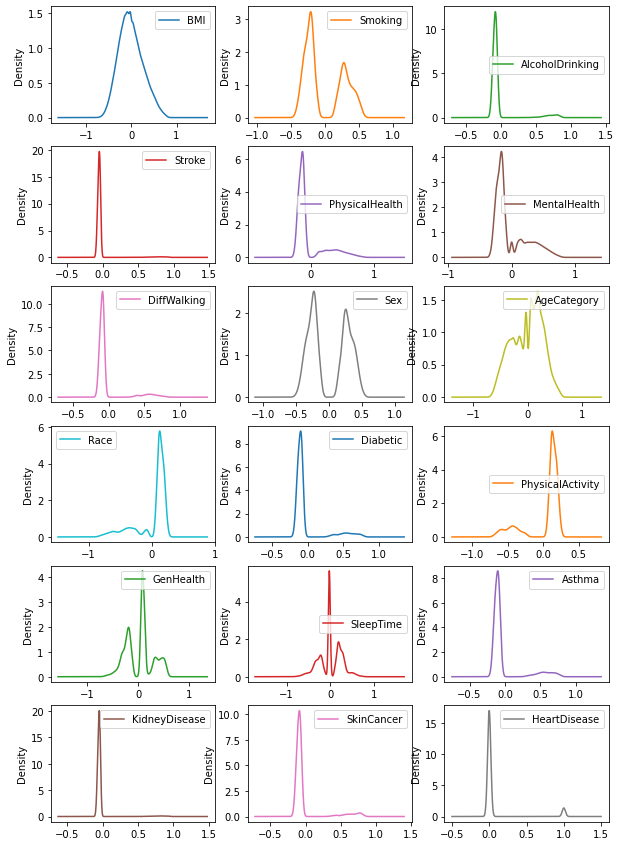

In [61]:
# Checking the rescaled, standardized and normalized data for normal or non-normal distribution using density plot

normalized_df_R_S_N.plot(kind='density', subplots=True, layout=(6,3), sharex=False, sharey=False)
plt.gcf().set_size_inches(10,15)
plt.show()

# Feature Selection Using RFE

In [62]:
transformed_data = normalized_df_R_S_N.copy()

<AxesSubplot:>

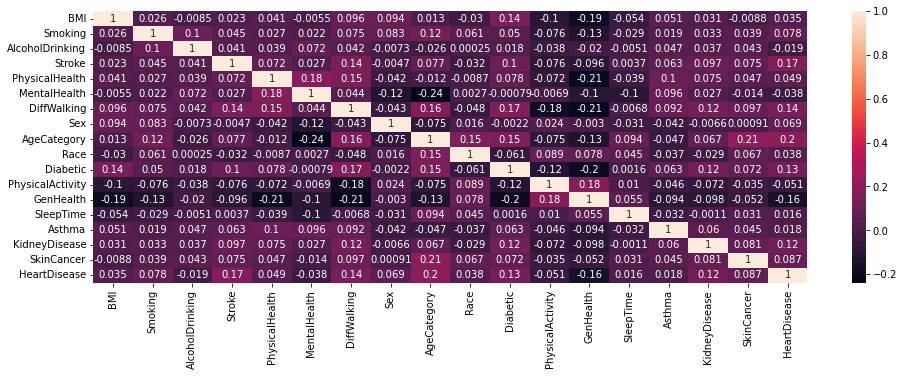

In [63]:
# Identifying presence of multicolinearity in the data using pairson correlation test.

correlation_matrix = transformed_data.corr()
plt.figure(figsize=(16,5))
sns.heatmap(correlation_matrix, annot=True)

In [64]:
threshold = 0.8

collinear_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > threshold:
            collinear_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))
print("Collinear variable pairs:")
for pair in collinear_pairs:
    #print(pair)
    var1, var2 = pair
    correlation = correlation_matrix.loc[var1, var2]
    print(f"{var1} - {var2}, Correlation: {correlation:.2f}")

Collinear variable pairs:


In [65]:
# There are no correlated features in the data. we go on to do feature selection using Recursive Feature Elimination.

In [66]:
# 
transformed_data_arr = transformed_data.values
X = transformed_data_arr[:, 0:17]
Y = transformed_data_arr[:, 17]

column_names = transformed_data.columns.tolist()

model = LogisticRegression(max_iter=500)
feature_select = RFE(model, n_features_to_select=9)
fit = feature_select.fit(X,Y)

print(fit.support_)
print()
print("Column rankings:")
for column_name, ranking in zip(column_names, fit.ranking_):
    print(column_name, "-", ranking)

[False  True False  True False False  True  True  True False  True False
  True False False  True  True]

Column rankings:
BMI - 5
Smoking - 1
AlcoholDrinking - 6
Stroke - 1
PhysicalHealth - 3
MentalHealth - 8
DiffWalking - 1
Sex - 1
AgeCategory - 1
Race - 4
Diabetic - 1
PhysicalActivity - 7
GenHealth - 1
SleepTime - 9
Asthma - 2
KidneyDisease - 1
SkinCancer - 1


In [67]:
transformed_data.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'HeartDisease'],
      dtype='object')

In [68]:
# Testing the model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 500)
Pred = model.fit(X,Y)
score = model.score(X,Y)

In [69]:
print(score)

0.9257406193329729


In [73]:
X1 = df[['Smoking','Stroke','DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'GenHealth', 'KidneyDisease', 'SkinCancer']].values
Y = Y

model = LogisticRegression(max_iter=1000)
Pred = model.fit(X1,Y)
score = model.score(X1,Y)

In [74]:
print(score)

0.9257942943461042


In [76]:
# Converting the selected columns into a pandas dataframe.

preprocessed_data = pd.DataFrame(X1, columns = ['Smoking','Stroke','DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'GenHealth', 'KidneyDisease', 'SkinCancer'])

In [78]:
preprocessed_data['HeartDisease'] = Y

In [79]:
preprocessed_data

,Smoking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,GenHealth,KidneyDisease,SkinCancer,HeartDisease
0,1.0,0.0,0.0,0.0,7.0,1.0,3.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,12.0,0.0,3.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,11.0,0.0,2.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,12.0,1.0,2.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,12.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
260824,0.0,0.0,0.0,0.0,8.0,0.0,4.0,0.0,0.0,0.0
260825,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
260826,1.0,0.0,1.0,1.0,8.0,1.0,1.0,0.0,0.0,1.0
260827,1.0,0.0,0.0,1.0,3.0,0.0,3.0,0.0,0.0,0.0


In [80]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260829 entries, 0 to 260828
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Smoking        260829 non-null  float64
 1   Stroke         260829 non-null  float64
 2   DiffWalking    260829 non-null  float64
 3   Sex            260829 non-null  float64
 4   AgeCategory    260829 non-null  float64
 5   Diabetic       260829 non-null  float64
 6   GenHealth      260829 non-null  float64
 7   KidneyDisease  260829 non-null  float64
 8   SkinCancer     260829 non-null  float64
 9   HeartDisease   260829 non-null  float64
dtypes: float64(10)
memory usage: 19.9 MB


In [81]:
# Using Decision Tree Algorithm to build a prediction model to predict if a person has heart disease or not.
# 

In [84]:
data_arr = preprocessed_data.values

X = data_arr[0:200000,0:9]
Y = data_arr[0:200000,9]

model = DecisionTreeClassifier()
model.fit(X,Y)

DecisionTreeClassifier()

In [86]:
# using the rest of the data points as my test data so that I can run the model on an unseen samples to predict the outcome

X_test = data_arr[200000:,0:9]
Y_test = data_arr[200000:,9]

In [87]:
# Predicting the outcome of the X_test data which is an unseen data.
Preds = model.predict(X_test)

In [88]:
# this is the result of the model's predictions
Preds

array([0., 0., 0., ..., 0., 0., 0.])

In [89]:
# this is the actual outcome 
Y_test

array([0., 0., 0., ..., 1., 0., 0.])

In [90]:
# scoring the performance of the model by comparing the predicted and the actual outcomes
Score = model.score(X_test, Y_test)

In [92]:
print(Score*100)

92.26355850005754
